# **🐍 応答倍率・位相差 可視化Pythonコード**

このコードは，講義の結論である「共振曲線」と「位相差曲線」の2つのグラフを同時に描画するものです．

In [ ]:
%pip install japanize_matplotlib

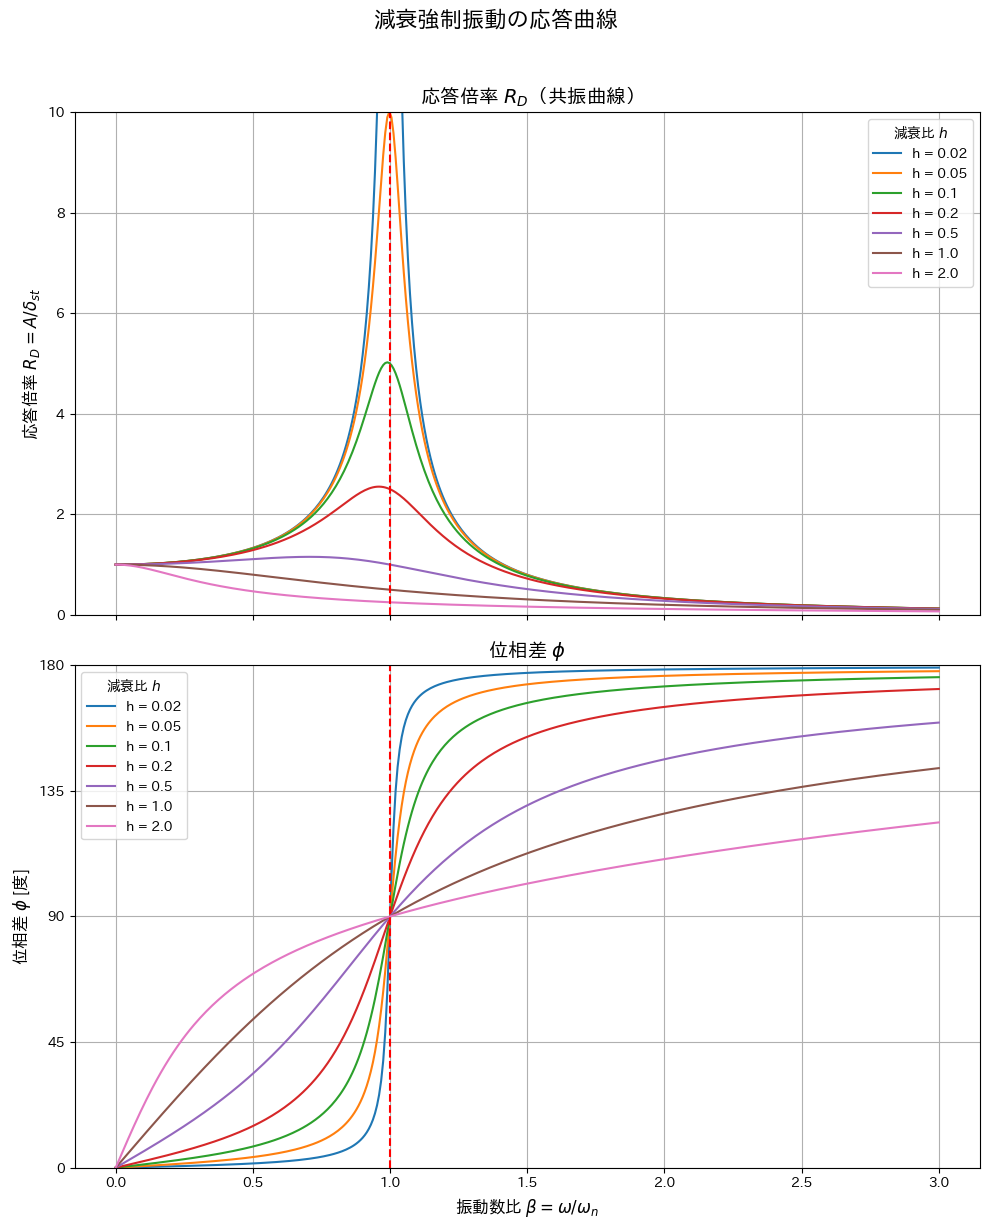

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

# -----------------------------------------------------------------
# 1. パラメータ設定
# -----------------------------------------------------------------

# 比較したい減衰比 h のリスト
# 講義資料のグラフに合わせて代表的な値を設定
h_values = [0.02, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0]

# 振動数比 β (ω/ωn) の計算範囲
# 0から3までを400点で分割
beta = np.linspace(0, 3, 401)

# -----------------------------------------------------------------
# 2. グラフ描画の準備
# -----------------------------------------------------------------

# 2つのグラフを上下に並べて描画 (figsizeで全体のサイズを指定)
# fig: 図全体, (ax1, ax2): 上下の各グラフ描画エリア
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)
fig.suptitle('減衰強制振動の応答曲線', fontsize=16, y=1.02)

# -----------------------------------------------------------------
# 3. 各hについて計算とプロット
# -----------------------------------------------------------------

for h in h_values:
    # --- (A) 応答倍率 R_D の計算 ---
    # R_D = 1 / sqrt( (1 - β^2)^2 + (2hβ)^2 )
    denominator_Rd = np.sqrt((1.0 - beta**2)**2 + (2.0 * h * beta)**2)
    Rd = 1.0 / denominator_Rd

    # --- (B) 位相差 φ の計算 (度単位) ---
    # φ = arctan( 2hβ / (1 - β^2) )
    # np.arctan2(y, x) を使うと、β=1 (x=0) の前後でも正しく計算できる
    # np.degrees() でラジアンから度に変換
    phi_rad = np.arctan2(2.0 * h * beta, 1.0 - beta**2)
    phi_deg = np.degrees(phi_rad)

    # --- (C) 各グラフにプロット ---
    label_text = f'h = {h}'

    # 上のグラフ (ax1) に応答倍率をプロット
    ax1.plot(beta, Rd, label=label_text)

    # 下のグラフ (ax2) に位相差をプロット
    ax2.plot(beta, phi_deg, label=label_text)

# -----------------------------------------------------------------
# 4. グラフの仕上げ
# -----------------------------------------------------------------

# --- 上のグラフ (応答倍率) の装飾 ---
ax1.set_title('応答倍率 $R_D$（共振曲線）', fontsize=14)
ax1.set_ylabel('応答倍率 $R_D = A / \\delta_{st}$', fontsize=12)
ax1.legend(title='減衰比 $h$')
ax1.grid(True)
# 共振点 (β=1) に縦の破線を引く
ax1.axvline(x=1.0, color='red', linestyle='--', label='共振点 ($\\beta=1$)')
#ax1.set_ylim(bottom=0) # y軸の最小値を0に設定
# 応答倍率は0から15の範囲をとることを示す
ax1.set_ylim(0, 10)

# --- 下のグラフ (位相差) の装飾 ---
ax2.set_title('位相差 $\\phi$', fontsize=14)
ax2.set_xlabel('振動数比 $\\beta = \\omega / \\omega_n$', fontsize=12)
ax2.set_ylabel('位相差 $\\phi$ [度]', fontsize=12)
ax2.legend(title='減衰比 $h$')
ax2.grid(True)
# β=1 の点に縦の破線を引く
ax2.axvline(x=1.0, color='red', linestyle='--', label='共振点 ($\\beta=1$)')
# 位相差は0から180度の範囲をとることを示す
ax2.set_ylim(0, 180)
# y軸の目盛りを調整 (0, 45, 90, 135, 180度)
ax2.set_yticks(np.arange(0, 181, 45))


# レイアウトを調整してグラフが重ならないようにする
plt.tight_layout()
# グラフを表示
plt.show()

## **1. 準備（ライブラリの読み込み）**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

*   **import numpy as np**: 数値計算ライブラリ numpy を np というあだ名で読み込みます．配列計算（ベクトル化）や，np.sqrt（ルート），np.degrees（度への変換）などを使います．
*   **import matplotlib.pyplot as plt**: グラフ描画ライブラリ matplotlib を plt というあだ名で読み込みます．
*   **import japanize_matplotlib**: グラフのタイトルやラベルを日本語化します．

## **2. パラメータ設定**

In [ ]:
# 比較したい減衰比 h のリスト
h_values = [0.1, 0.2, 0.5, 1.0, 2.0]

# 振動数比 β (ω/ωn) の計算範囲
beta = np.linspace(0, 3, 401)

*   h_values:グラフに描画したい減衰比$h$の値をリストとして準備します．for ループでこのリストから値を1つずつ取り出して使います．
*   beta = np.linspace(0, 3, 401): グラフの**横軸**となる振動数比 $\beta$ の配列（Numpy配列）を作成します．0 から 3 までを 401 個の点（0.0075刻み）で分割したデータを作成します．

## **3. グラフ描画の準備**

In [ ]:
# 2つのグラフを上下に並べて描画
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)
fig.suptitle('減衰強制振動の応答曲線', fontsize=16, y=1.02)

*   plt.subplots(2, 1, ...) : これがグラフを2つ作成する命令です．「2行1列」（つまり上下に2つ）のグラフを描画するキャンバスを準備します．
*   fig : グラフ全体（図）を指す変数です．
*   (ax1, ax2) : 2つの描画エリア（上のグラフ ax1 と，下のグラフ ax2）を指す変数です．
*   sharex=True : 2つのグラフの横軸（X軸）を共通にします（片方をズームするともう片方もズームされます）．
*  fig.suptitle(...) : 図全体のメインタイトルを設定します．

## **4. 各 $h$ について計算とプロット**

In [ ]:
for h in h_values:
    # --- (A) 応答倍率 R_D の計算 ---
    denominator_Rd = np.sqrt((1.0 - beta**2)**2 + (2.0 * h * beta)**2)
    Rd = 1.0 / denominator_Rd

    # --- (B) 位相差 φ の計算 (度単位) ---
    phi_rad = np.arctan2(2.0 * h * beta, 1.0 - beta**2)
    phi_deg = np.degrees(phi_rad)

    # --- (C) 各グラフにプロット ---
    ax1.plot(beta, Rd, label=f'h = {h}')
    ax2.plot(beta, phi_deg, label=f'h = {h}')

*  for h in h_values : h_values リスト（[0.1, 0.2, ...]）から $h$ の値を1つずつ取り出し，以下の処理を繰り返します（合計5回ループ）．
*  **(A) 応答倍率 $R_D$ の計算:**
   *  $R_D = \frac{1}{\sqrt{(1 - \beta^2)^2 + (2h\beta)^2}}$ の公式を，Numpyのベクトル化計算で実行しています．
   *  beta は単一の値ではなく配列なので，beta**2 や np.sqrt(...) も配列全体に一度に適用され，Rd も配列として計算されます．
*  **(B) 位相差**
   *  $\phi$ の計算:$\tan(\phi) = \frac{2h\beta}{1 - \beta^2}$ から $\phi$ を求めます．
   *  np.arctan2(y, x): $\arctan(y/x)$ を計算する関数ですが，$\beta=1$ のときに分母 $x$ が $0$ になる場合も正しく（$\phi=90^\circ$ として）計算してくれる賢い関数です．
   *  np.degrees(phi_rad): arctan2 の結果（ラジアン単位）を，グラフで分かりやすい**「度」単位**（0〜180°）に変換します．
*  **(C) 各グラフにプロット:**
   *  ax1.plot(...): 上のグラフ（ax1）に応答倍率 $R_D$ を描画します．
   *  ax2.plot(...): 下のグラフ（ax2）に位相差 $\phi$ を描画します．
   *  label=f'h = {h}': 凡例（はんれい）に「h = 0.1」のように表示するための名前を付けます．

## 5. **グラフの仕上げ**

In [ ]:
# --- 上のグラフ (応答倍率) の装飾 ---
ax1.set_title('応答倍率 $R_D$（共振曲線）', fontsize=14)
ax1.set_ylabel('応答倍率 $R_D = A / \\delta_{st}$', fontsize=12)
ax1.legend(title='減衰比 $h$')
ax1.grid(True)
ax1.axvline(x=1.0, color='red', linestyle='--', label='共振点 ($\\beta=1$)')
...
# --- 下のグラフ (位相差) の装飾 ---
ax2.set_title('位相差 $\\phi$', fontsize=14)
ax2.set_xlabel('振動数比 $\\beta = \\omega / \\omega_n$', fontsize=12)
ax2.set_ylabel('位相差 $\\phi$ [度]', fontsize=12)
ax2.set_yticks([0, 45, 90, 135, 180])
...
plt.tight_layout()
plt.show()